# **PPDai Dataset Preprocessing**

In [1]:
from src import utilities
from src import preprocessing
from src import plotting

ppdai_ds_path = '../../datasets/PPDaiData/ppdaiData.csv'
ppdai_prep_ds_path = '../../datasets/preprocessed/ppdai/'

(CVXPY) May 25 06:58:08 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 25 06:58:08 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
utilities.create_directory(ppdai_prep_ds_path)

In [3]:
data = utilities.read_csv(ppdai_ds_path, dtype={'label': bool})
data

,sex,occupation,education,marriage,household,income,outcome,income_tm,outcome_tm,tm_encode_3,prior_account,prior_repay,credit_limit,account_balance,minimun_repay,consume_count,account,adjust_account,circulated_interest,avaliable_balance,cash_limit,repay_state,browse_data,loan_time,time,yu_e,yu_e_categery,yu_e_tm,yu_e_tm_categery,label
0,1,2,3,1,3,13.734079,13.255397,5.900126e+09,5.900935e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,5914855887,5.914856e+09,0.478681,1.0,-8.094010e+05,3.0,False
1,1,2,3,2,1,0.000000,0.000000,0.000000e+00,0.000000e+00,5.659685e+09,15.684107,15.277706,18.638974,19.872065,13.109063,2.521739,15.319652,0.000000,0.000000,0.000000,7.087560,0.0,151500.0,5914855887,2.551708e+08,0.000000,2.0,0.000000e+00,2.0,False
2,1,4,4,1,4,13.249264,9.834236,4.767557e+09,5.899778e+09,0.000000e+00,18.366771,18.580174,18.361833,18.348271,16.045651,2.000000,18.581412,0.000000,0.000000,0.000000,0.000000,0.0,38586.0,5914855887,5.914856e+09,3.415028,1.0,-1.132222e+09,3.0,False
3,1,4,4,3,2,12.128566,10.920132,5.042088e+09,5.902715e+09,5.912412e+09,7.268065,4.948698,16.055204,18.847398,17.456999,0.055556,7.313613,0.000000,0.000000,1.014342,7.808445,0.0,38764.0,5914855887,2.443522e+06,1.208435,1.0,-8.606264e+08,3.0,True
4,1,2,2,3,1,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,20.679226,18.539760,20.664418,20.636046,18.474369,0.000000,17.957256,0.000000,0.000000,0.000000,19.971271,0.0,0.0,5914855887,5.914856e+09,0.000000,2.0,0.000000e+00,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55591,1,2,3,1,4,0.000000,0.000000,0.000000e+00,0.000000e+00,5.937622e+09,7.468202,10.357137,12.530589,20.104776,18.003887,0.000000,12.034397,2.191276,6.001059,0.000000,12.357302,0.0,46890.0,5932135887,-5.486400e+06,0.000000,2.0,0.000000e+00,2.0,False
55592,1,4,2,1,4,0.000000,0.000000,0.000000e+00,0.000000e+00,5.907957e+09,7.853140,7.060006,13.590873,18.251186,16.956516,0.000000,8.711834,0.000000,0.286304,0.000000,7.284420,0.0,19600.0,5932135887,2.417882e+07,0.000000,2.0,0.000000e+00,2.0,True
55593,1,2,4,1,4,0.000000,0.000000,0.000000e+00,0.000000e+00,5.918528e+09,19.650582,19.406607,20.352278,19.522997,17.220416,0.708333,19.277586,4.846773,0.000000,0.000000,8.948062,0.0,104040.0,5932135887,1.360766e+07,0.000000,2.0,0.000000e+00,2.0,False
55594,1,2,3,3,4,0.000000,0.000000,0.000000e+00,0.000000e+00,4.227085e+09,6.524374,6.761914,9.462677,19.319294,18.124119,0.285714,8.996214,1.078283,0.294457,0.000000,9.277013,0.0,70720.0,5932135887,1.705051e+09,0.000000,2.0,0.000000e+00,2.0,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55596 entries, 0 to 55595
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  55596 non-null  int64  
 1   occupation           55596 non-null  int64  
 2   education            55596 non-null  int64  
 3   marriage             55596 non-null  int64  
 4   household            55596 non-null  int64  
 5   income               55596 non-null  float64
 6   outcome              55596 non-null  float64
 7   income_tm            55596 non-null  float64
 8   outcome_tm           55596 non-null  float64
 9   tm_encode_3          55596 non-null  float64
 10  prior_account        55596 non-null  float64
 11  prior_repay          55596 non-null  float64
 12  credit_limit         55596 non-null  float64
 13  account_balance      55596 non-null  float64
 14  minimun_repay        55596 non-null  float64
 15  consume_count        55596 non-null 

#### Fix column names formatting.

In [5]:
data.columns = data.columns.str.replace("_", "-")

#### Plot features data types.

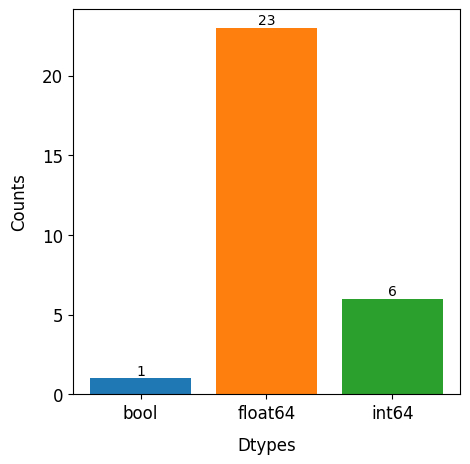

In [6]:
plotting.plot_dtypes_hist(data, save_path=ppdai_prep_ds_path)

#### Data cleaning.

In [7]:
before_data_cleaning_count = len(data)

#### Rename features labels to have more meaningful names.

In [8]:
data.rename(columns={'label':'defaulted'}, inplace=True)

#### Plot class distribution.

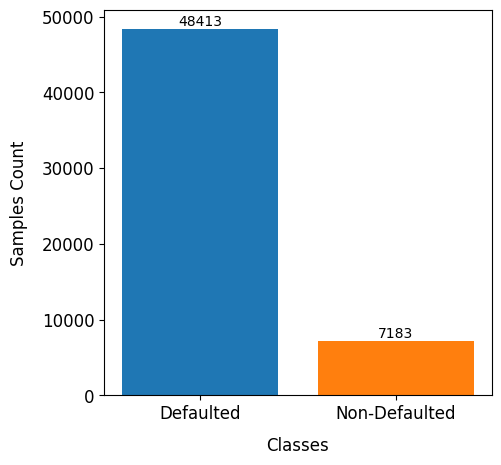

In [9]:
plotting.plot_class_distr_hist(data, save_path=ppdai_prep_ds_path)

#### Plot missing values histogram.

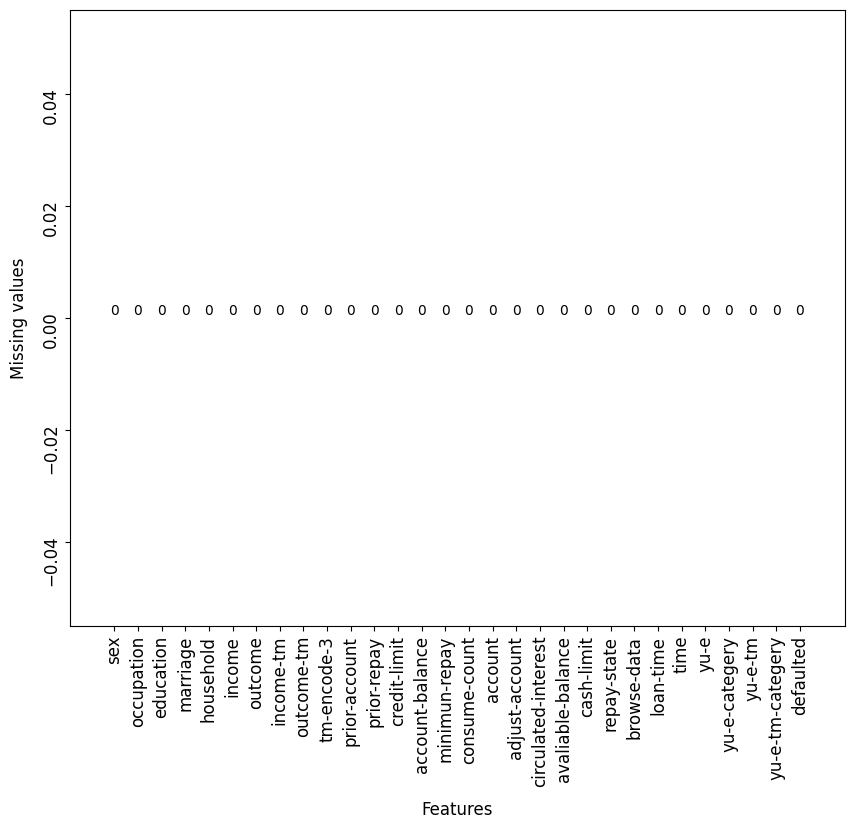

In [10]:
plotting.plot_missing_hist(data, figsize=(10,8), save_path=ppdai_prep_ds_path)

#### Drop useless and ambiguous features.

In [11]:
data.drop(['loan-time'], axis=1, inplace=True)

#### Drop redundant features using IV score.
#### This was computed previously but getting rid of them a-priori helps next pre-processing steps.

In [12]:
#data.drop(['income', 'income-tm', 'outcome', 'outcome-tm', 'adjust-account', 'account-balance', 'avaliable-balance', 'repay-state', 'yu-e', 'yu-e-tm'], axis=1, inplace=True)

In [13]:
data['income'] = data['income'].astype('float64')
data['income-tm'] = data['income-tm'].astype('float64')
data['outcome'] = data['outcome'].astype('float64')
data['outcome-tm'] = data['outcome-tm'].astype('float64')
data['adjust-account'] = data['adjust-account'].astype('float64')
data['account-balance'] = data['account-balance'].astype('float64')
data['avaliable-balance'] = data['avaliable-balance'].astype('float64')

#### Fix nominal features encoded as integers.

In [14]:
data['sex'] = data['sex'].astype('category')
data['occupation'] = data['occupation'].astype('category')
data['education'] = data['education'].astype('category')
data['marriage'] = data['marriage'].astype('category')
data['household'] = data['household'].astype('category')
data['yu-e-categery'] = data['yu-e-categery'].astype('category')
data['yu-e-tm-categery'] = data['yu-e-tm-categery'].astype('category')

#### Apply optimal binninf and WoE.

In [15]:
data, features_scores = preprocessing.optbinning_woe(data=data, solver="cp",
                                                     outlier_detector="range",
                                                     save_path=ppdai_prep_ds_path,
                                                     verbose=True)



Processing feature: sex.
2023-05-25 18:58:09,076 | INFO : Optimal binning started.
2023-05-25 18:58:09,077 | INFO : Options: check parameters.
2023-05-25 18:58:09,077 | INFO : Pre-processing started.
2023-05-25 18:58:09,077 | INFO : Pre-processing: number of samples: 55596
2023-05-25 18:58:09,079 | INFO : Pre-processing: number of clean samples: 55596
2023-05-25 18:58:09,080 | INFO : Pre-processing: number of missing samples: 0
2023-05-25 18:58:09,080 | INFO : Pre-processing: number of special samples: 0
2023-05-25 18:58:09,080 | INFO : Pre-processing: number of outlier samples: 0
2023-05-25 18:58:09,081 | INFO : Pre-processing: number of others samples: 0
2023-05-25 18:58:09,081 | INFO : Pre-processing: number of categories: 3
2023-05-25 18:58:09,081 | INFO : Pre-processing: number of categories others: 0
2023-05-25 18:58:09,081 | INFO : Pre-processing terminated. Time: 0.0017s
2023-05-25 18:58:09,082 | INFO : Pre-binning started.
2023-05-25 18:58:09,086 | INFO : Pre-binning: number

In [16]:
data

,sex,occupation,education,marriage,household,income,outcome,income-tm,outcome-tm,tm-encode-3,prior-account,prior-repay,credit-limit,account-balance,minimun-repay,consume-count,account,adjust-account,circulated-interest,avaliable-balance,cash-limit,repay-state,browse-data,time,yu-e,yu-e-categery,yu-e-tm,yu-e-tm-categery,defaulted
0,-0.067719,0.024517,0.024040,0.026343,0.094712,0.0,0.0,0.0,0.0,0.173198,-0.320838,-0.332093,0.015567,-0.013636,-0.008373,-0.109586,-0.250675,-2.220446e-16,-0.056738,0.0,-0.254015,0.0,0.101374,0.184679,0.0,-0.226771,0.0,-0.286807,False
1,-0.067719,0.024517,0.024040,-0.085255,0.094712,0.0,0.0,0.0,0.0,0.173198,0.297504,0.147988,0.048281,-0.014634,-0.008373,-0.128770,0.211191,-2.220446e-16,-0.056738,0.0,0.144357,0.0,0.217452,0.184679,0.0,0.050382,0.0,0.050805,False
2,-0.067719,-0.127574,-0.129615,0.026343,-0.059451,0.0,0.0,0.0,0.0,0.173198,-0.046936,0.283185,0.048281,-0.013636,-0.008373,-0.128770,-0.000582,-2.220446e-16,-0.056738,0.0,-0.254015,0.0,0.060640,0.184679,0.0,-0.226771,0.0,-0.286807,False
3,-0.067719,-0.127574,-0.129615,0.001962,-0.087725,0.0,0.0,0.0,0.0,-0.145307,0.082360,-0.332093,0.214425,-0.013636,-0.008373,0.333966,0.094342,-2.220446e-16,-0.056738,0.0,0.359069,0.0,0.060640,-0.383760,0.0,-0.226771,0.0,-0.286807,True
4,-0.067719,0.024517,0.341148,0.001962,0.094712,0.0,0.0,0.0,0.0,0.173198,-0.087270,0.283185,-0.081138,-0.014634,0.148778,-0.109586,-0.000582,-2.220446e-16,-0.056738,0.0,-0.054921,0.0,0.101374,0.184679,0.0,0.050382,0.0,0.050805,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55591,-0.067719,0.024517,0.024040,0.026343,-0.059451,0.0,0.0,0.0,0.0,1.089976,0.082360,-0.008310,0.091099,-0.014634,0.020049,-0.109586,0.287250,-2.220446e-16,0.218527,0.0,0.165638,0.0,0.076775,1.430408,0.0,0.050382,0.0,0.050805,False
55592,-0.067719,-0.127574,0.341148,0.026343,-0.059451,0.0,0.0,0.0,0.0,-0.145307,0.082360,-0.072700,0.091099,-0.013636,-0.008373,-0.109586,0.094342,-2.220446e-16,0.162153,0.0,0.144357,0.0,-0.005975,-0.156622,0.0,0.050382,0.0,0.050805,True
55593,-0.067719,0.024517,-0.129615,0.026343,-0.059451,0.0,0.0,0.0,0.0,-0.145307,-0.087270,0.174262,-0.081138,-0.014634,-0.008373,0.094861,-0.000582,-2.220446e-16,-0.056738,0.0,0.359069,0.0,0.217452,-0.156622,0.0,0.050382,0.0,0.050805,False
55594,-0.067719,0.024517,0.024040,0.001962,-0.059451,0.0,0.0,0.0,0.0,0.173198,0.082360,-0.072700,0.015567,0.159958,0.020049,0.117074,0.094342,-2.220446e-16,0.162153,0.0,0.165638,0.0,0.217452,0.184679,0.0,0.050382,0.0,0.050805,False


#### All missing values handled.

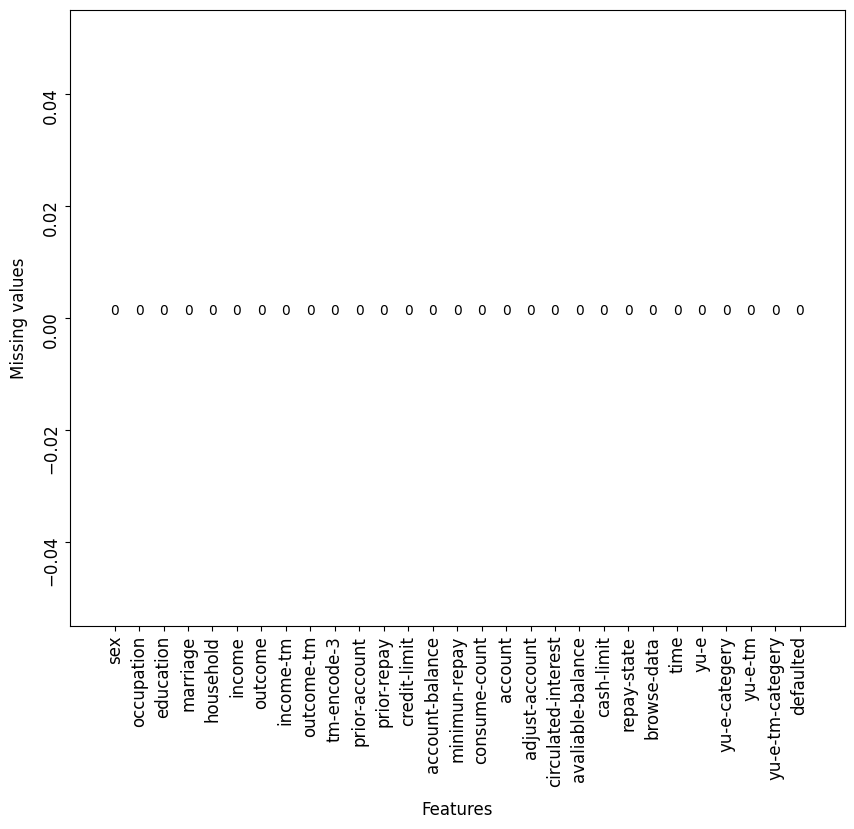

In [17]:
plotting.plot_missing_hist(data, figsize=(10,8), save_path=ppdai_prep_ds_path)

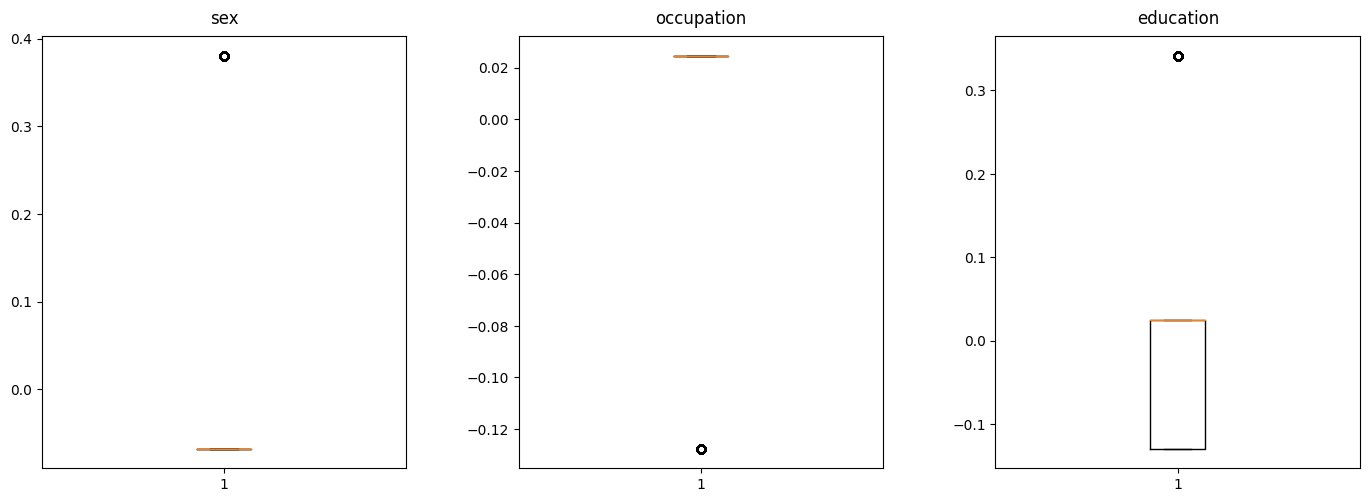

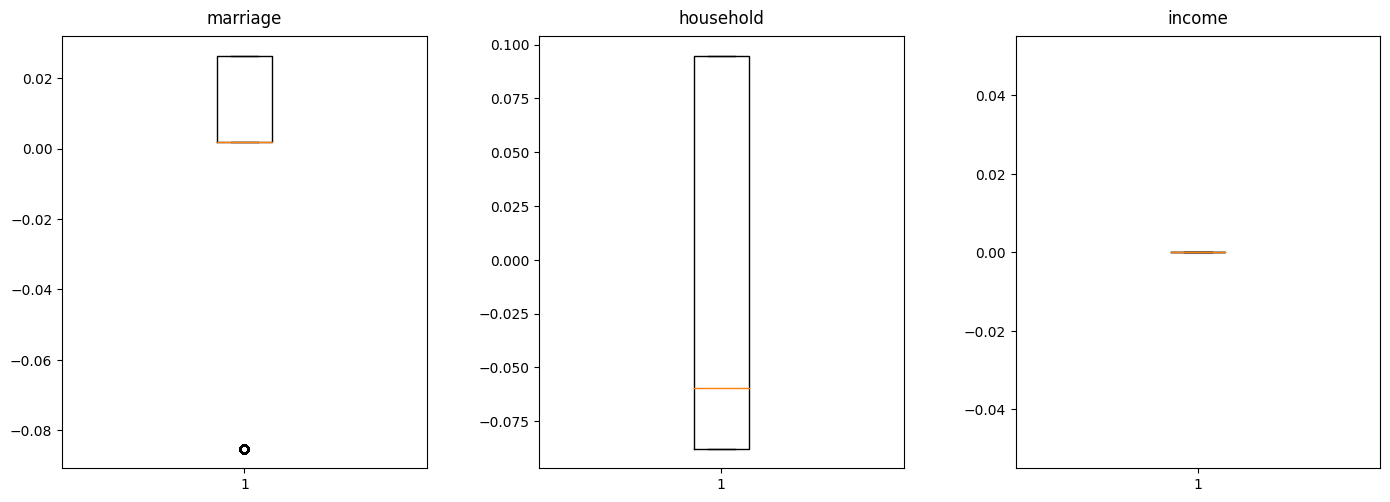

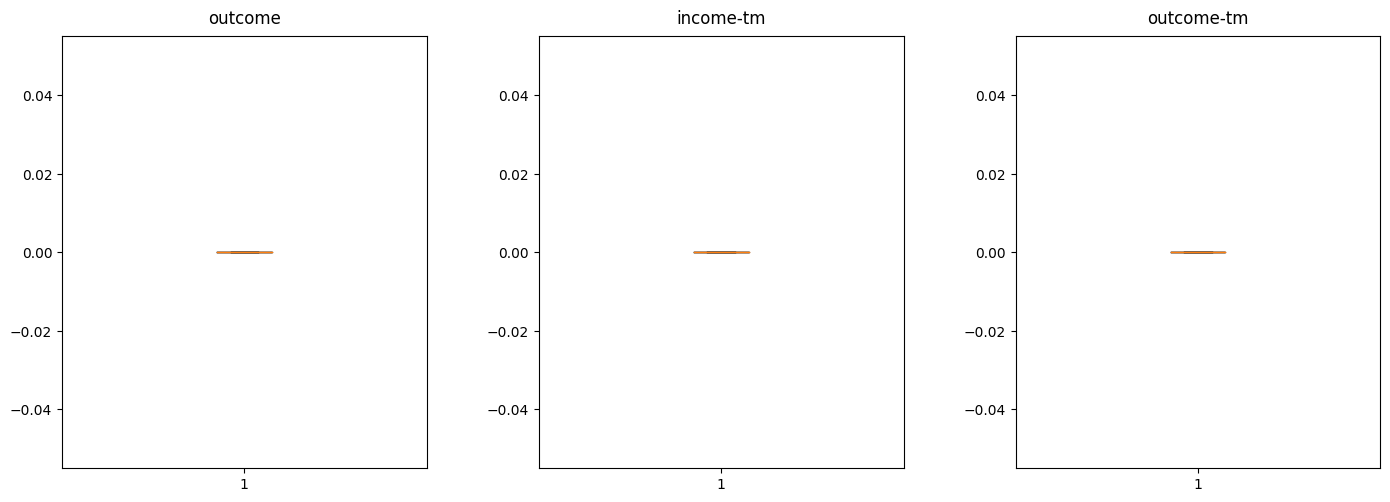

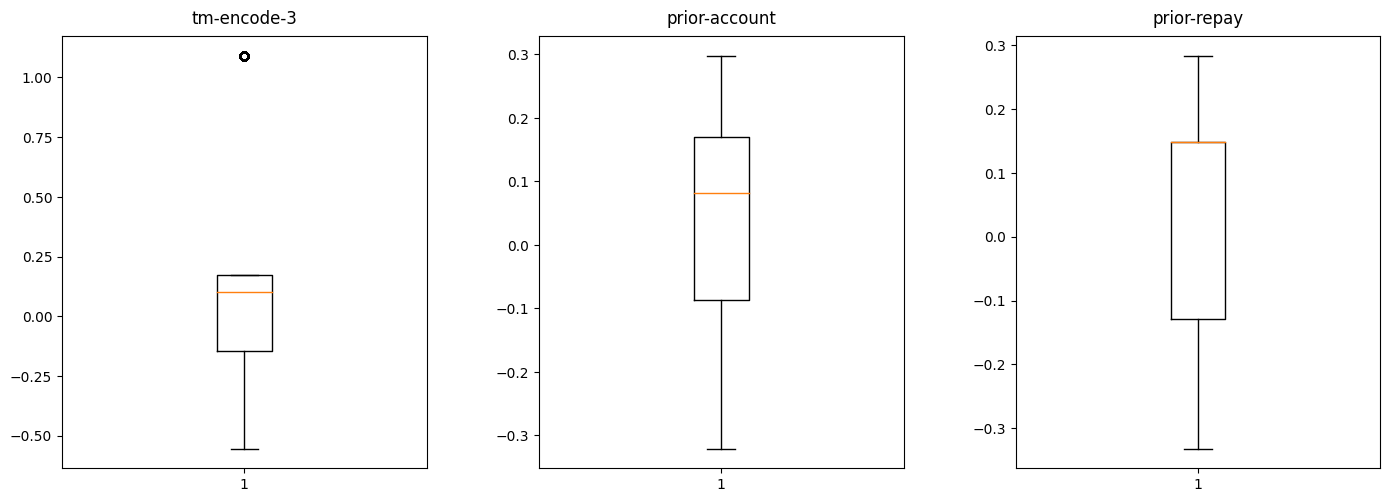

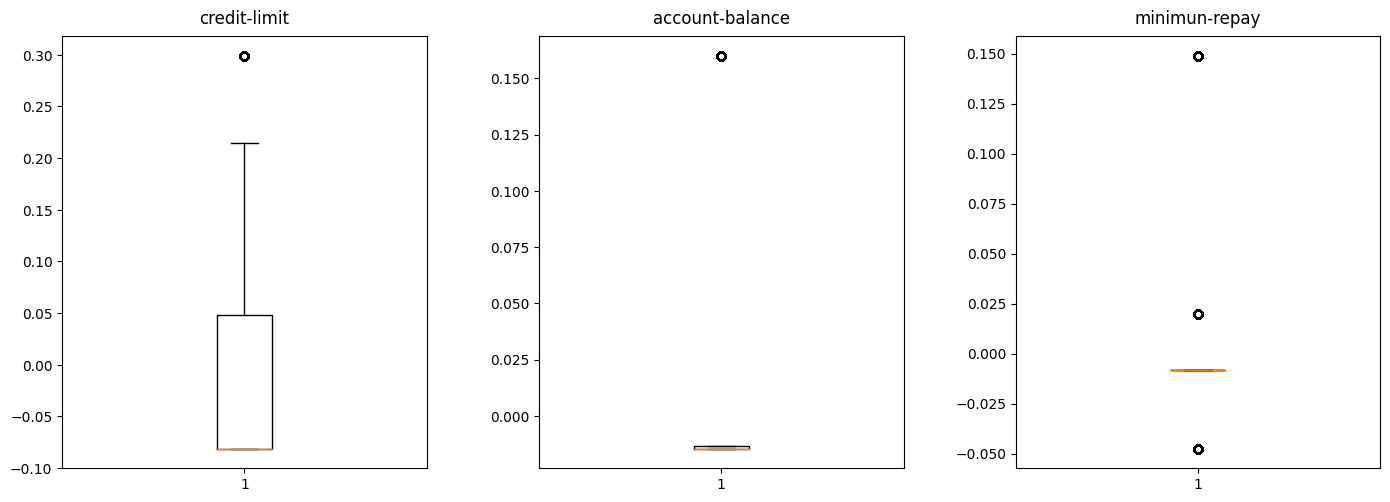

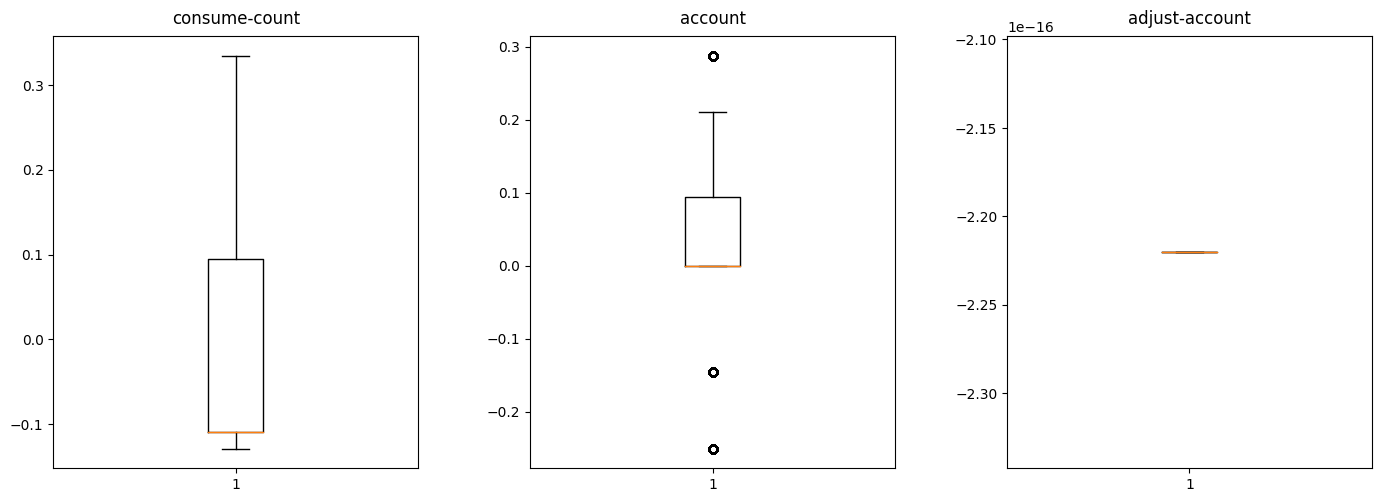

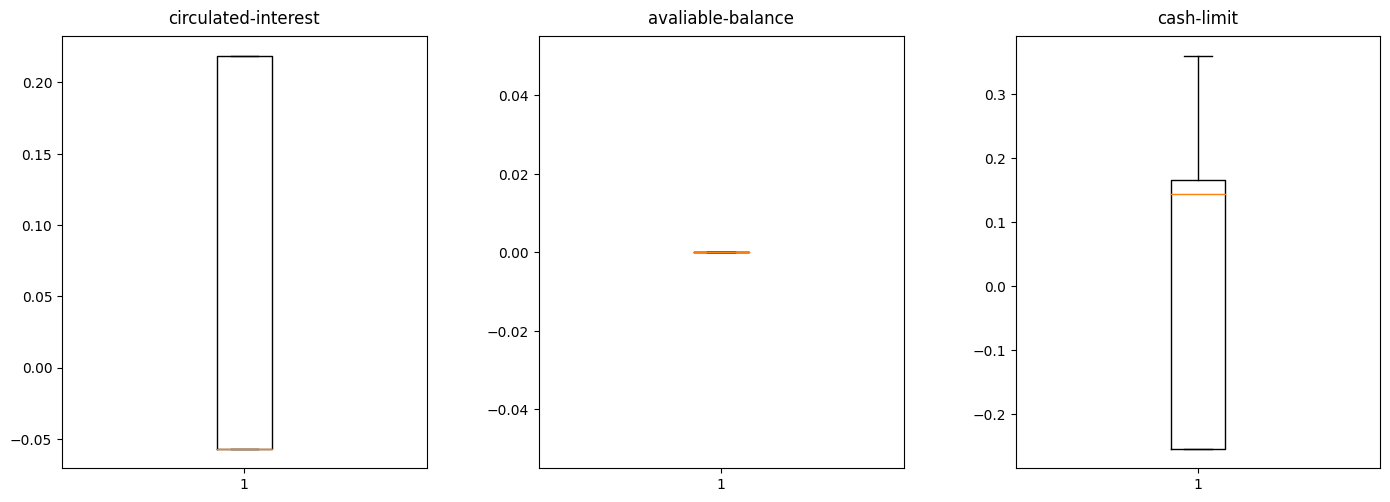

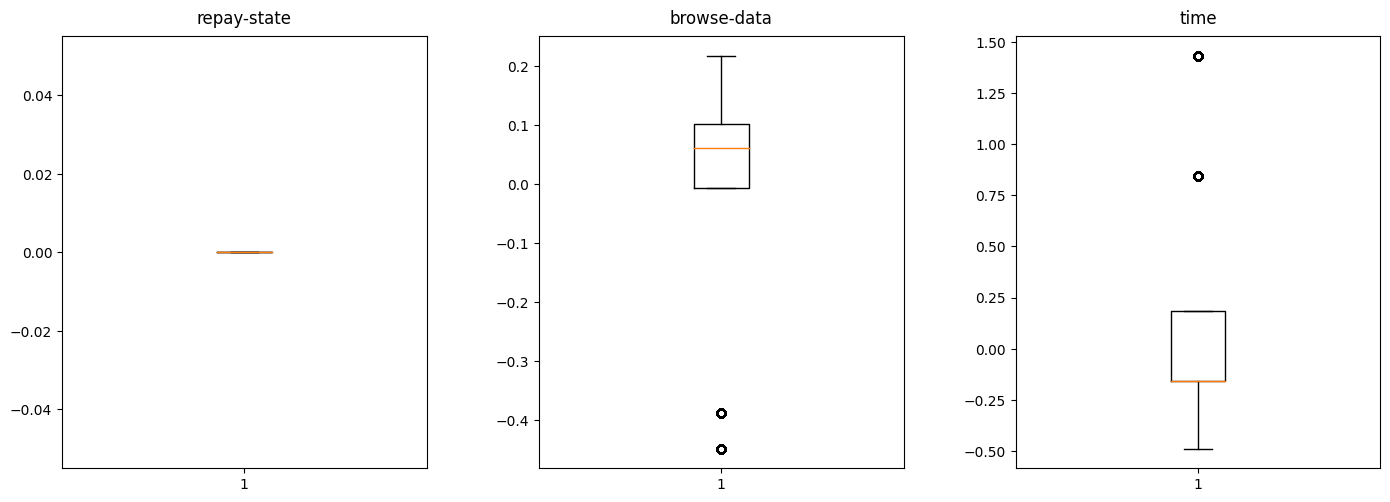

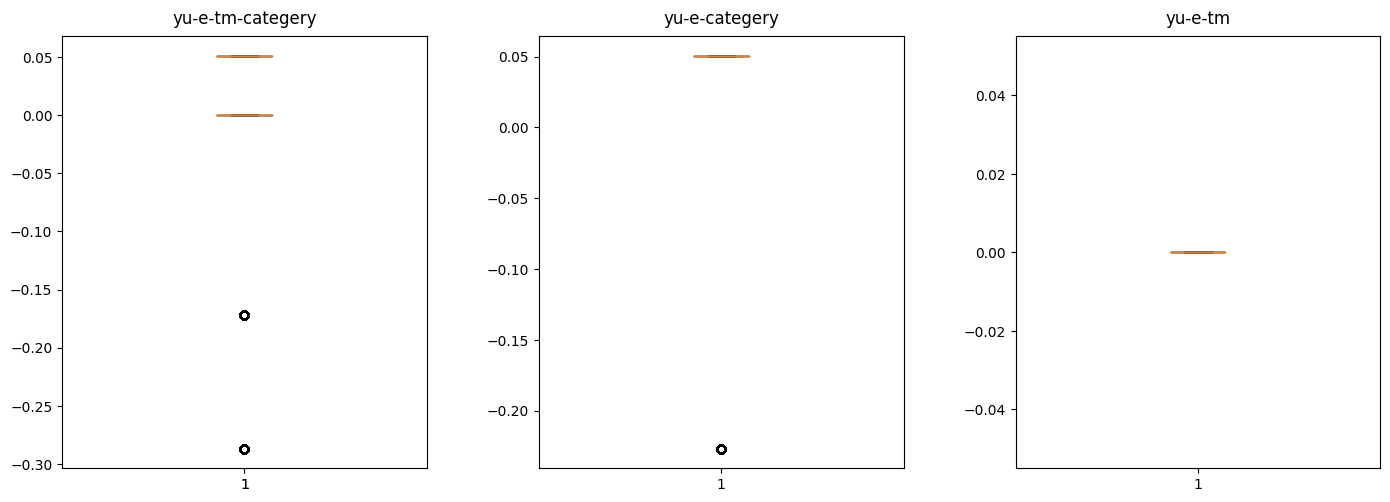

In [18]:
plotting.plot_numerical_boxplots(data, size=(15, 6), save_path=ppdai_prep_ds_path)

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

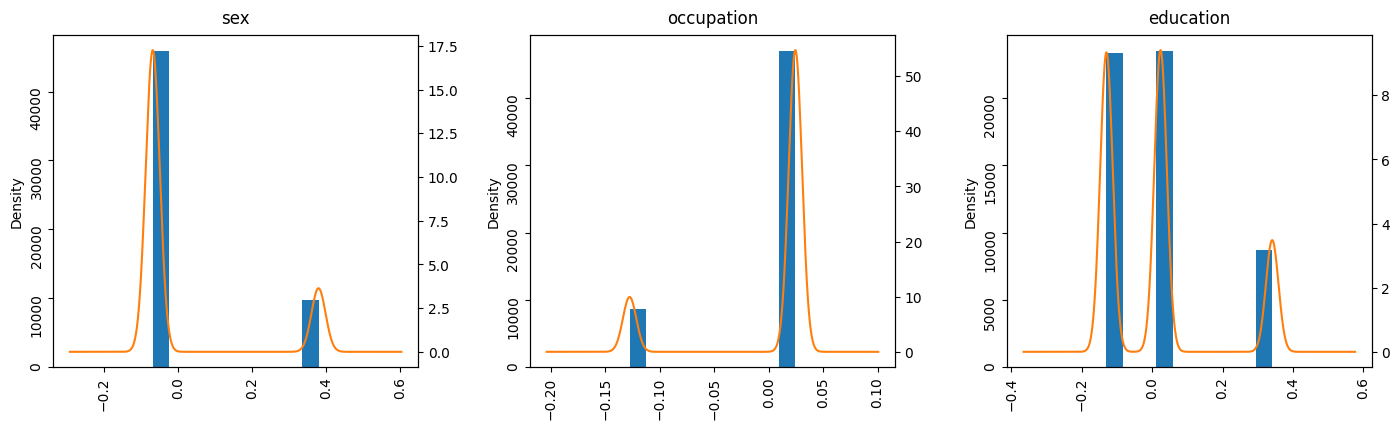

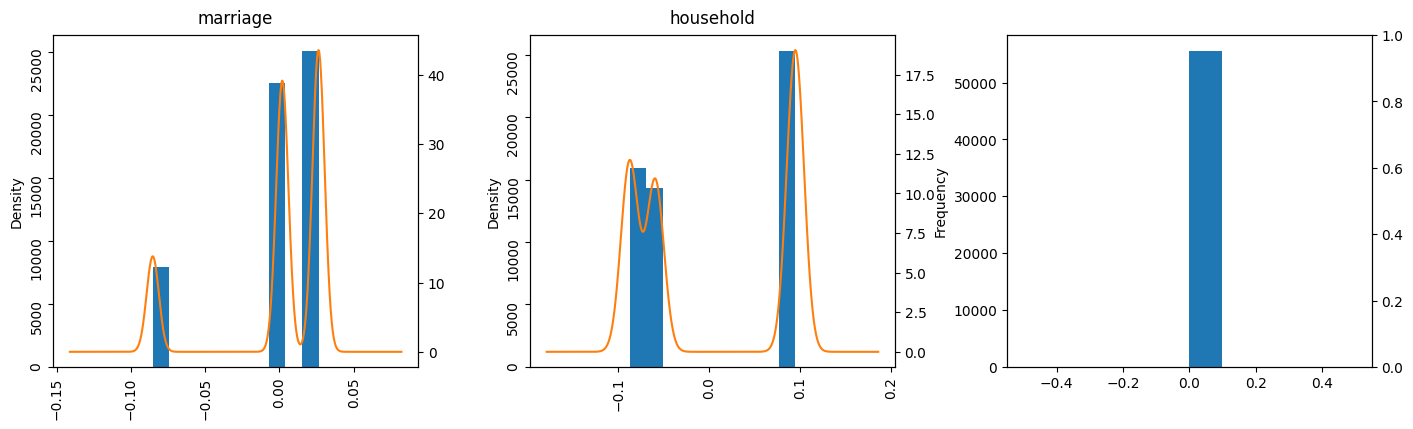

In [19]:
plotting.plot_numerical_hist_kde(data, size=(15,5), save_path=ppdai_prep_ds_path)

#### Plot samples count before and after Data cleaning.

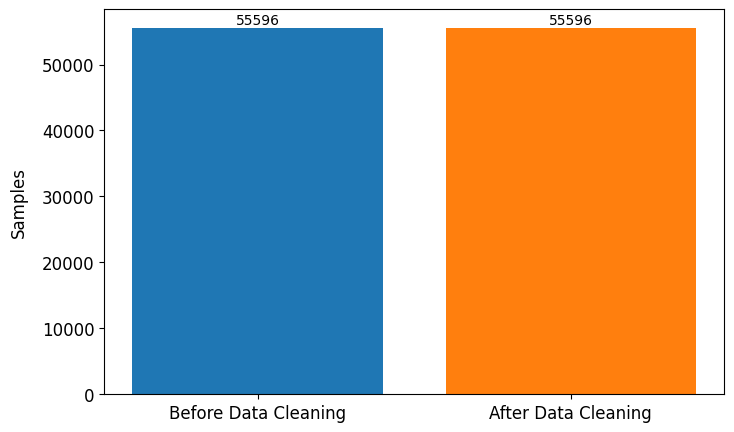

In [20]:
after_data_cleaning_count = len(data)
labels = ['Before Data Cleaning', 'After Data Cleaning']
values = [before_data_cleaning_count, after_data_cleaning_count]
plotting.plot_hist(labels, values, '', '', 'Samples', figsize=(8,5), rotated_ticks=False,
                   save_path=ppdai_prep_ds_path + 'before_after.pdf')

#### Features IV scores

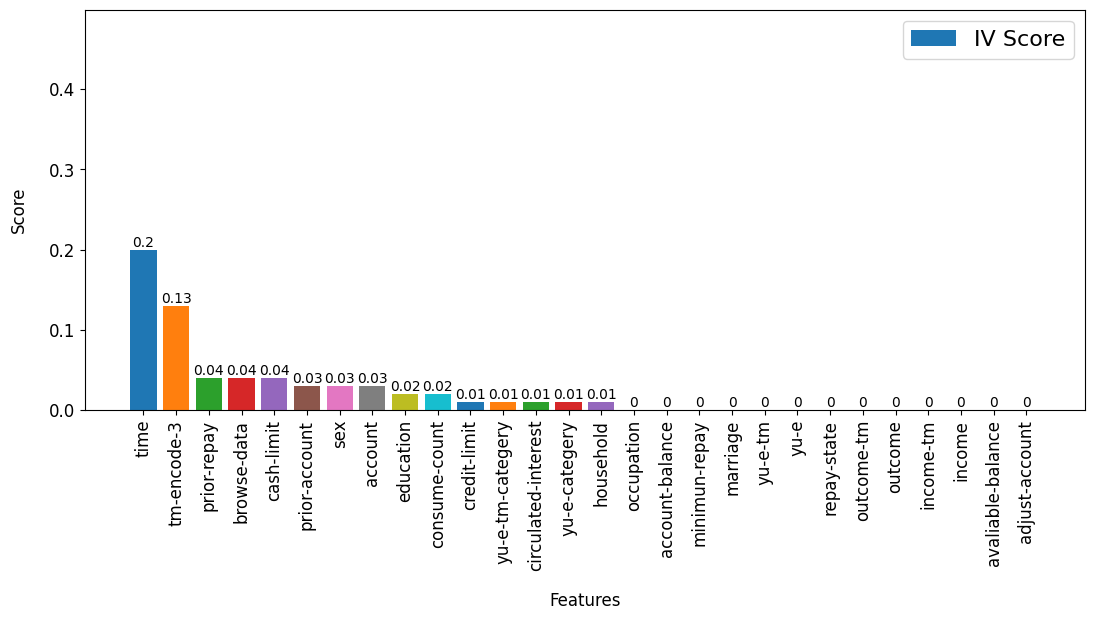

In [21]:
plotting.plot_features_scores(features_scores, '')

#### Features correlation

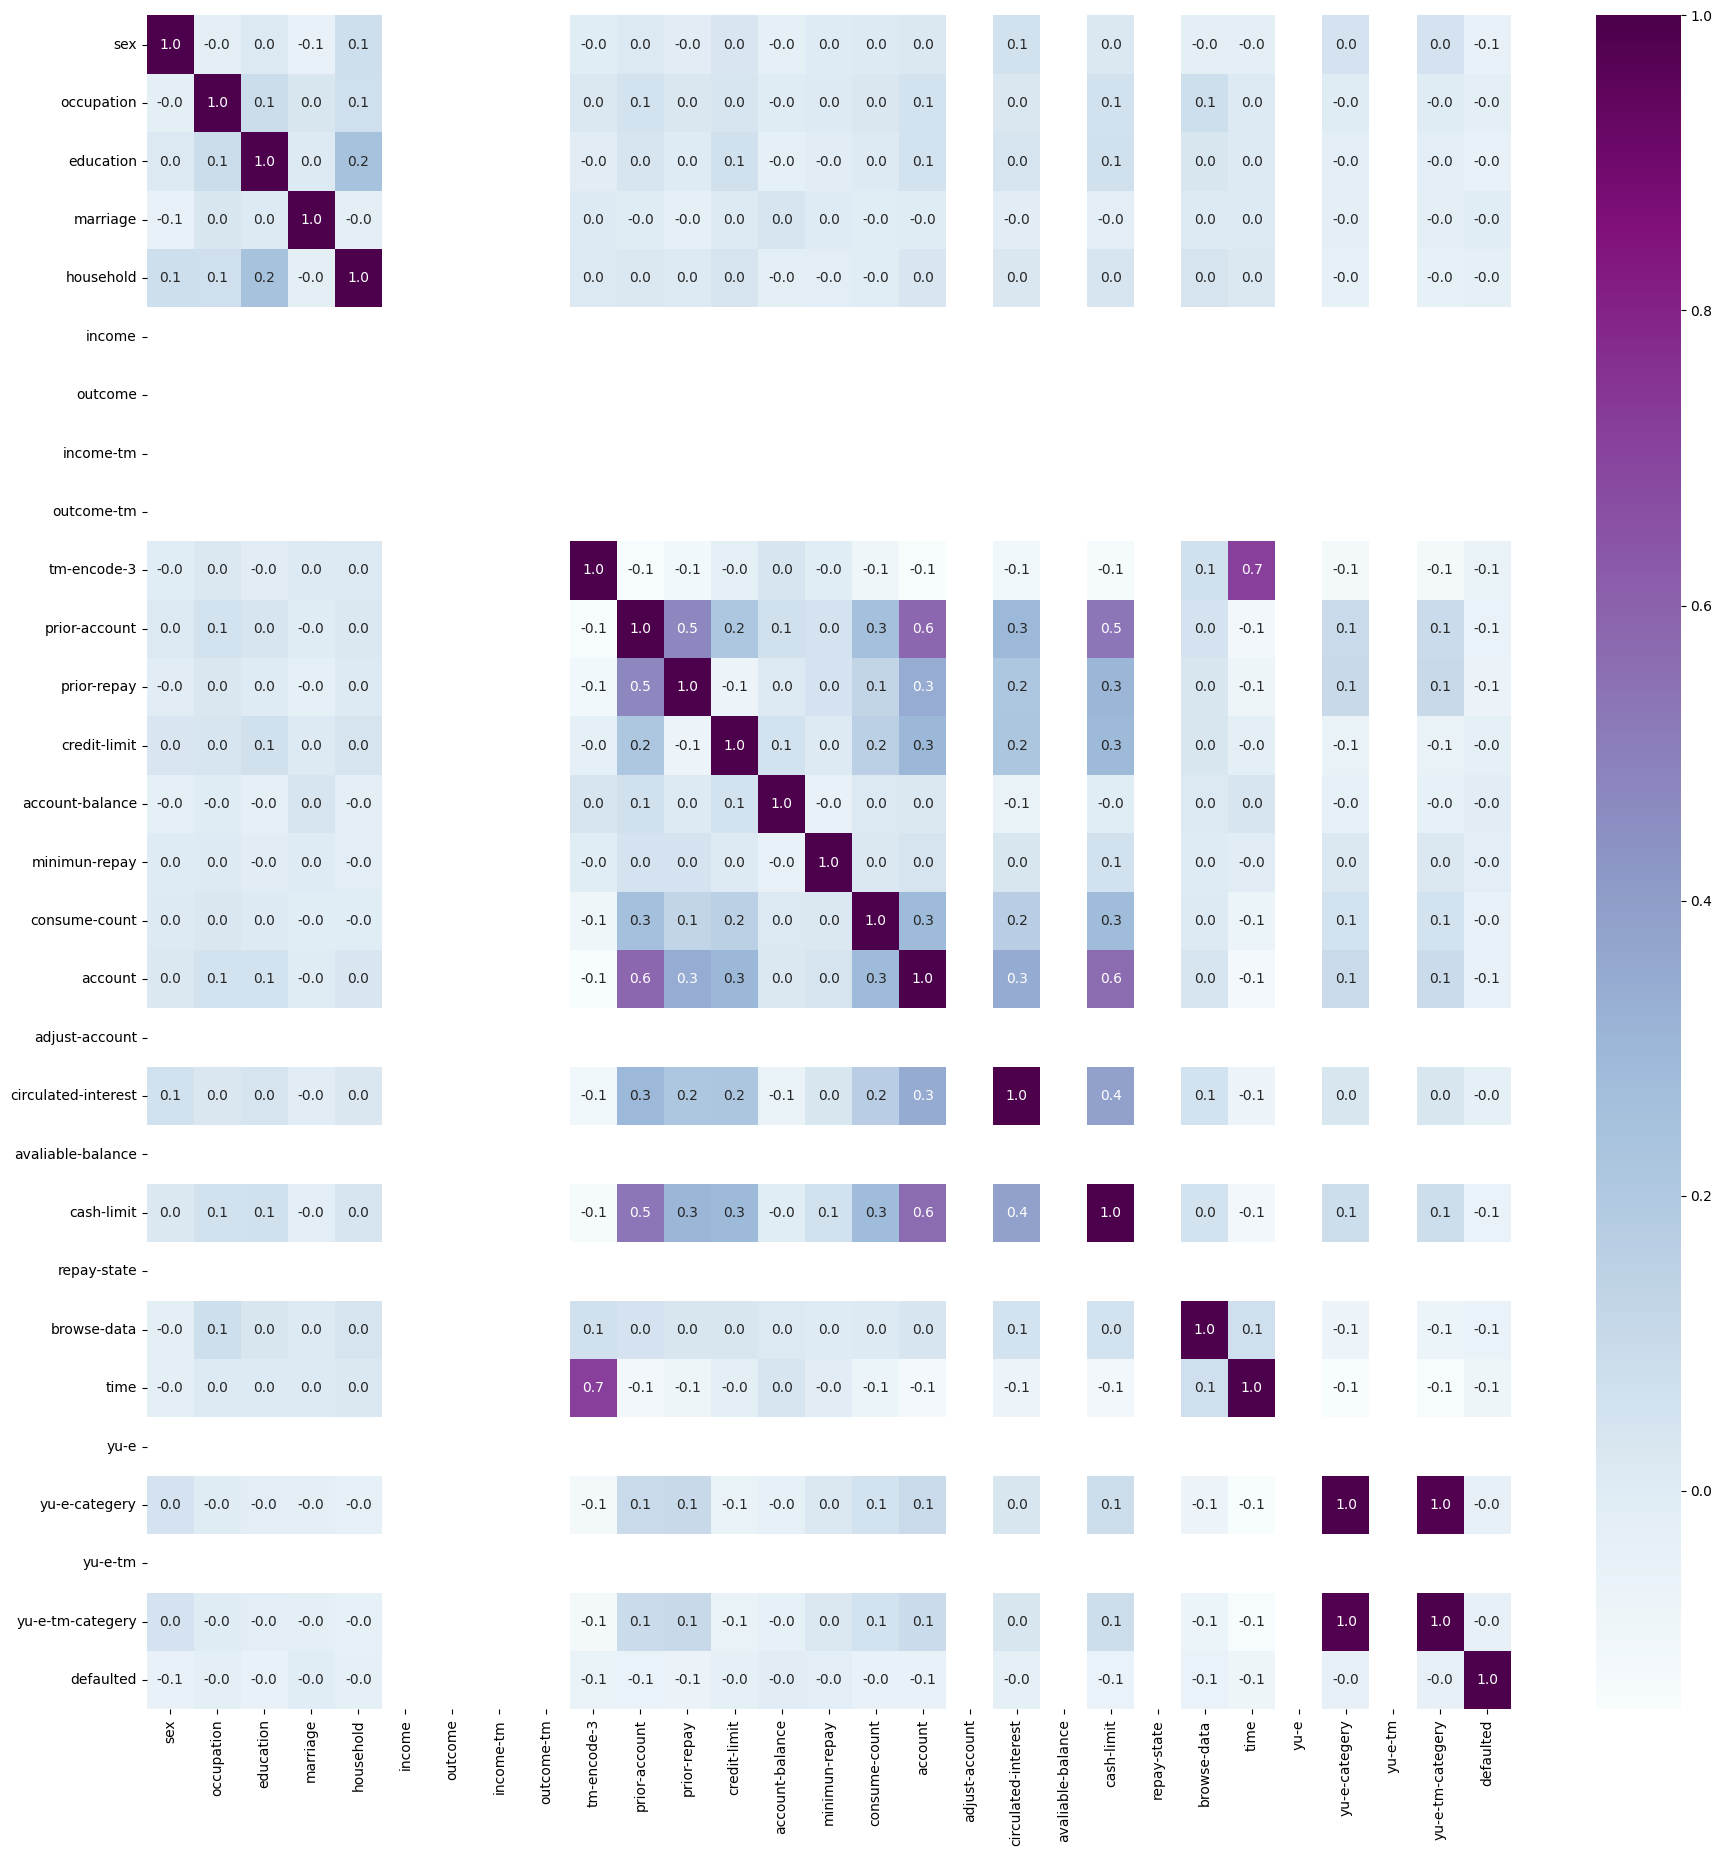

In [22]:
f_corr = preprocessing.features_correlation(data=data)
plotting.plot_heatmap(f_corr, figsize=(22, 22), save_path=ppdai_prep_ds_path, dpi=100)

#### Drop redundant features using IV score.

In [23]:
to_be_dropped = ['yu-e-categery']
data.drop(to_be_dropped, axis=1, inplace=True)
for key in to_be_dropped:
    del features_scores[key]

#### Save preprocessed dataset.

In [ ]:
data

In [ ]:
data.info(verbose=True)

**EMP-$p_1$:**

In [ ]:
preprocessing.compute_p1(data)

**EMP-$p_0$:**

In [ ]:
preprocessing.compute_p0(data)

In [ ]:
preprocessing.save_dataset(data=data,
                           features_scores=features_scores,
                           test_size=0.2,
                           save_path=ppdai_prep_ds_path)